In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Instructional Files
file_2007 = "../../datasets/subsets/inst_ex/inst_ex_2007.csv"

inst_2007 = pd.read_csv(file_2007)
inst_2007 = inst_2007.set_index(['STNAME'])
inst_2007

,2007_E11,2007_E12,2007_E13,2007_E14,2007_E15,2007_E16,2007_E17,2007_E18,2007_E11A,2007_E11B,2007_E11C,2007_E11D,2007_E2
STNAME,,,,,,,,,,,,,
alabama,2377493739,886986737,97936916,2291851.0,4.492740e+05,277200826,7017400,13783921.0,1.693305e+09,2.905774e+08,109246691.0,31909765.0,49958721.0
alaska,561122474,261062514,50715139,189179.0,3.050000e+04,48780235,8317273,9198345.0,NaN,NaN,NaN,NaN,NaN
arizona,3512387495,731538675,185509030,5263934.0,1.683116e+07,179740297,136573775,136615128.0,2.109523e+09,3.235572e+08,66807134.0,114338136.0,111955822.0
arkansas,1654161613,427754086,66839199,9734016.0,7.189701e+06,191422132,26127317,15883159.0,1.085755e+09,1.712061e+08,85577613.0,140693279.0,37607608.0
california,23220351373,7107342112,1460319626,721724219.0,3.732542e+08,1948530832,38054692,3295315.0,1.736162e+10,2.659798e+09,140284557.0,787830871.0,579203842.0
colorado,2683761748,640195477,89180996,50423434.0,6.924168e+06,279961990,54947816,61655280.0,1.923670e+09,3.173173e+08,81868742.0,88716687.0,65462067.0
connecticut,3221094679,1141204140,146943633,296937365.0,6.269502e+07,120554799,35179480,7557365.0,2.098014e+09,3.437034e+08,36955457.0,111494799.0,NaN
delaware,554261330,245920909,15041540,6261836.0,6.481965e+07,32718390,2189819,7423037.0,3.453523e+08,1.078971e+08,16682990.0,21074806.0,6552089.0
district of columbia,370902174,44859108,22825933,140409915.0,NaN,7078791,20895807,NaN,1.917659e+08,4.546084e+07,4412981.0,12276169.0,6525215.0


In [4]:
(inst_2007.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      56.401611
new york        30.787029
pennsylvania    22.590036
texas           21.756777
florida         21.649884
dtype: float64

In [5]:
summary_2007 = pd.DataFrame(inst_2007.sum(axis=1)/100000000, columns=['Total InstructionalEx ($100M)'])
summary_2007['InstructionalEx ($100M)'] = inst_2007.iloc[:,0:8].sum(axis=1)/100000000
summary_2007['Teacher Salaries ($100M)'] = inst_2007.iloc[:,8:13].sum(axis=1)/100000000
summary_2007

,Total InstructionalEx ($100M),InstructionalEx ($100M),Teacher Salaries ($100M)
STNAME,,,
alabama,58.381581,36.631607,21.749974
alaska,9.394157,9.394157,0.000000
arizona,76.306412,49.044595,27.261817
arkansas,39.199504,23.991112,15.208391
california,564.016112,348.728724,215.287387
colorado,63.440853,38.670509,24.770343
connecticut,76.223338,50.321665,25.901673
delaware,14.261958,9.286365,4.975593
district of columbia,8.674128,6.069717,2.604411


In [6]:
summary_pct = pd.DataFrame(summary_2007['InstructionalEx ($100M)'] / summary_2007['Total InstructionalEx ($100M)'] *100, columns = ['Instructional (%)'])
summary_pct['Teacher Salaries (%)'] = summary_2007['Teacher Salaries ($100M)'] / summary_2007['Total InstructionalEx ($100M)'] *100
summary_pct

,Instructional (%),Teacher Salaries (%)
STNAME,,
alabama,62.745143,37.254857
alaska,100.000000,0.000000
arizona,64.273229,35.726771
arkansas,61.202592,38.797408
california,61.829568,38.170432
colorado,60.955217,39.044783
connecticut,66.018711,33.981289
delaware,65.112833,34.887167
district of columbia,69.974956,30.025044


In [7]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2007.csv"

success_2007 = pd.read_csv(dropout_path)
success_2007

,STNAME,2007_DRP912,2007_DRP9,2007_DRP10,2007_DRP11,2007_DRP12,2007_DRPAM,2007_DRPAS,2007_DRPHI,2007_DRPBL,2007_DRPWH
0,alabama,2.299999,1.900000,2.599998,2.599998,2.500000,1.000000,0.700000,2.500000,2.799999,2.099998
1,alaska,7.299999,4.599998,6.599998,8.699997,9.599998,9.500000,6.699997,9.000000,10.000000,5.199997
2,arizona,7.599998,4.699997,5.699997,7.500000,13.199997,13.199997,4.099998,8.500000,7.899998,6.299999
3,arkansas,4.599998,2.900000,4.000000,5.599998,6.599998,4.500000,2.900000,5.500000,6.500000,4.000000
4,california,5.500000,3.199999,3.500000,4.500000,11.599998,7.699997,2.699999,6.799999,10.000000,3.500000
5,colorado,6.899998,5.399998,6.399998,7.099998,9.199997,12.500000,4.000000,13.799995,10.000000,4.299999
6,connecticut,2.099998,1.900000,2.099998,2.400000,1.900000,3.400000,1.099999,4.699997,3.599998,1.299999
7,delaware,5.500000,6.699997,5.699997,4.500000,4.399998,2.299999,2.299999,8.599998,7.099998,4.399998
8,district of columbia,7.099998,7.699997,7.599998,6.099998,6.500000,NaN,6.099998,11.000000,6.899998,1.599999
9,florida,3.799999,3.500000,3.699999,3.900000,4.399998,3.099998,1.799999,4.500000,5.799999,2.699999


In [8]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_pct['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
alabama,62.745143,37.254857,2.3
alaska,100.000000,0.000000,7.3
arizona,64.273229,35.726771,7.6
arkansas,61.202592,38.797408,4.6
california,61.829568,38.170432,5.5
colorado,60.955217,39.044783,6.9
connecticut,66.018711,33.981289,2.1
delaware,65.112833,34.887167,5.5
district of columbia,69.974956,30.025044,7.1


In [9]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
arizona,64.273229,35.726771,7.6
louisiana,62.549103,37.450897,7.4
michigan,64.379764,35.620236,7.4
alaska,100.000000,0.000000,7.3
district of columbia,69.974956,30.025044,7.1
colorado,60.955217,39.044783,6.9
new mexico,60.325548,39.674452,6.1
rhode island,62.885702,37.114298,5.8
north carolina,98.957614,1.042386,5.7


In [10]:
summary_2007['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_2007['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    

summary_2007 = summary_2007[summary_2007['Dropout Rate'].notna()]
summary_2007['Dropout Rate'] = summary_2007['Dropout Rate'].astype(float)
summary_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, alabama to wyoming
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total InstructionalEx ($100M)  49 non-null     float64
 1   InstructionalEx ($100M)        49 non-null     float64
 2   Teacher Salaries ($100M)       49 non-null     float64
 3   Dropout Rate                   49 non-null     float64
dtypes: float64(4)
memory usage: 1.9+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_pct['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, alabama to wyoming
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instructional (%)     49 non-null     float64
 1   Teacher Salaries (%)  49 non-null     float64
 2   Dropout Rate          49 non-null     float64
dtypes: float64(3)
memory usage: 1.5+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


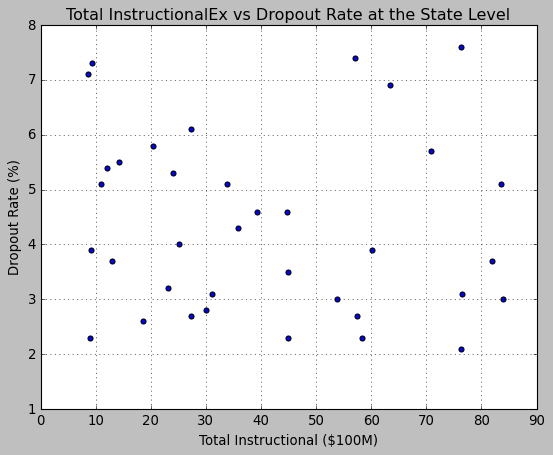

In [12]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2007['Total InstructionalEx ($100M)'], summary_2007['Dropout Rate'])
plt.xlabel('Total Instructional ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total InstructionalEx vs Dropout Rate at the State Level")
plt.grid()

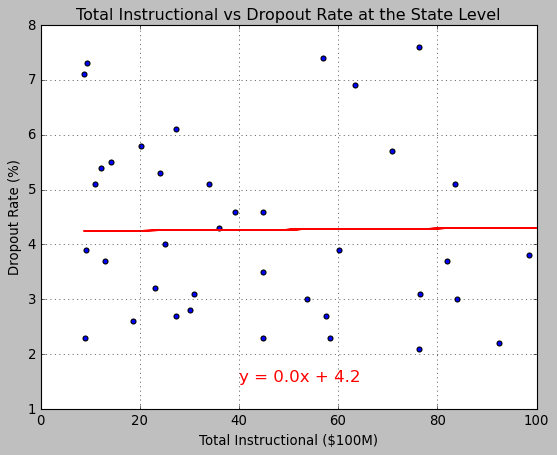

The correlation between both factors is 0.0386


In [13]:
# Total Instructional vs Dropout Rate
x_values = summary_2007['Total InstructionalEx ($100M)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

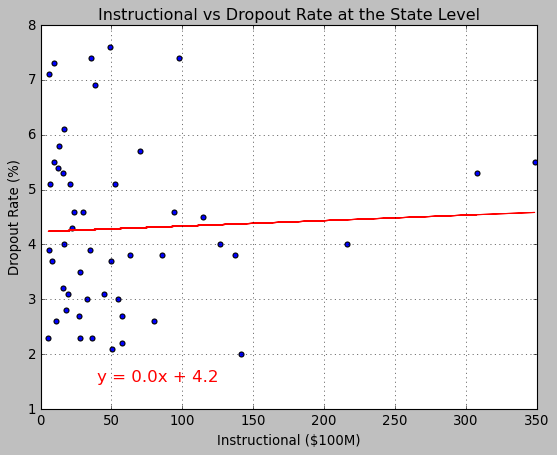

The correlation between both factors is 0.0452


In [14]:
# Total Instructional vs Dropout Rate
x_values = summary_2007['InstructionalEx ($100M)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 350)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

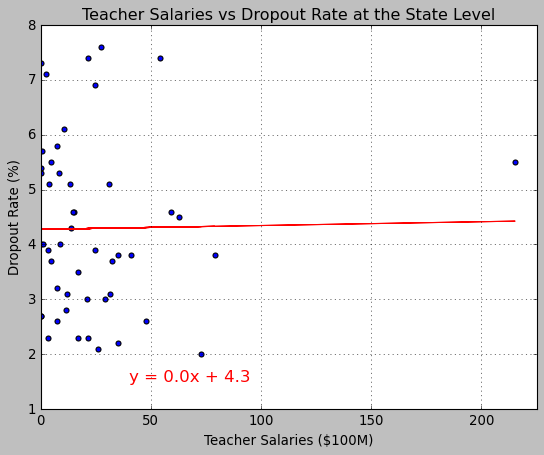

The correlation between both factors is 0.0151


In [15]:
# Teacher Salaries vs Dropout Rate
x_values = summary_2007['Teacher Salaries ($100M)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 225)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

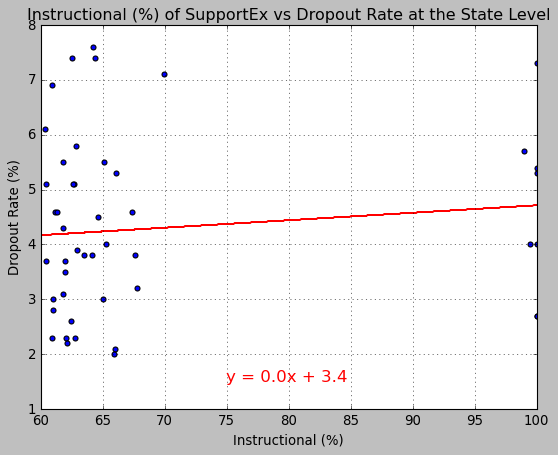

The correlation between both factors is 0.1203


In [16]:
# Instructional (%) vs Dropout Rate
x_values = summary_pct['Instructional (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,1.5),fontsize=15,color="red")
plt.xlabel('Instructional (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 60, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

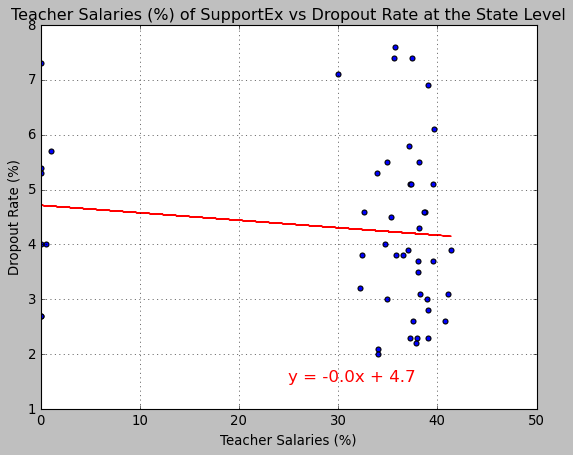

The correlation between both factors is -0.1203


In [17]:
# Teacher Salaries (%) vs Dropout Rate
x_values = summary_pct['Teacher Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 50)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")